In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Heart.csv')

In [3]:
df

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [5]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [9]:
df.AHD.value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

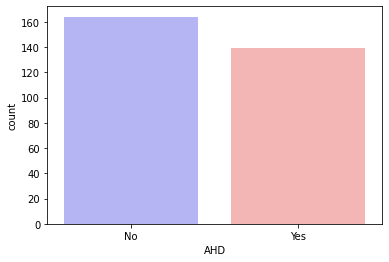

In [10]:
sns.countplot(x="AHD", data=df, palette="bwr")
plt.show()

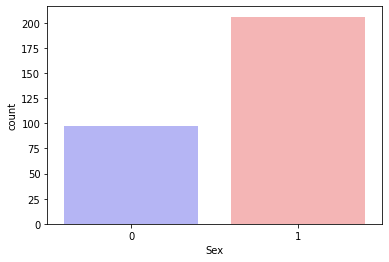

In [11]:
sns.countplot(x="Sex", data=df, palette="bwr")
plt.show()

In [19]:
countNoDisease = len(df[df.AHD == "No"])
countHaveDisease = len(df[df.AHD == "Yes"])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.AHD)*100))))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.AHD))*100)))

Percentage of Patients Haven't Heart Disease: 0.01%
Percentage of Patients Have Heart Disease: 45.87%


In [20]:
df.groupby('AHD').mean()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
AHD,,,,,,,,,,,,
No,148.073171,52.585366,0.560976,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.273292
Yes,156.633094,56.625899,0.820144,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.137681


<AxesSubplot:xlabel='Age'>

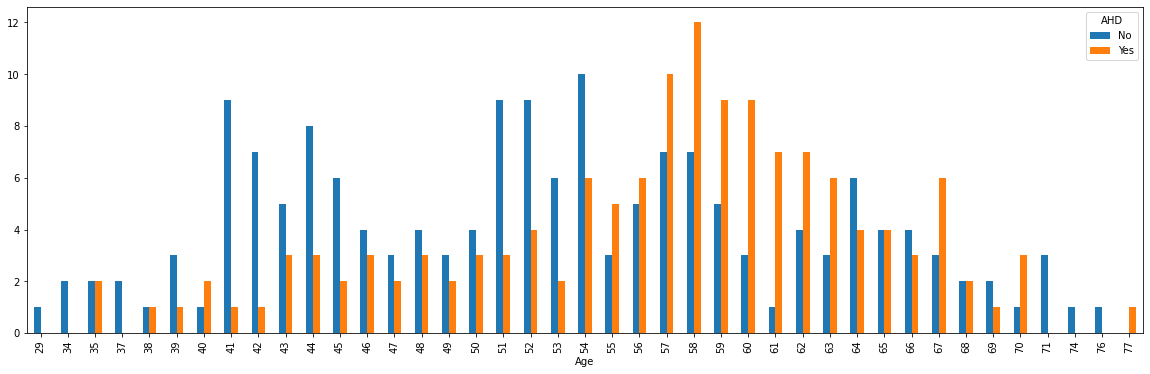

In [24]:
pd.crosstab(df.Age,df.AHD).plot(kind="bar",figsize=(20,6))

In [63]:
y = df.AHD.values


array(['No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No',

In [38]:

x = x.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')


AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [65]:
x= df.drop(['ChestPain','Thal','AHD'], axis = 1)
x

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,1,63,1,145,233,1,2,150,0,2.3,3,0.0
1,2,67,1,160,286,0,2,108,1,1.5,2,3.0
2,3,67,1,120,229,0,2,129,1,2.6,2,2.0
3,4,37,1,130,250,0,0,187,0,3.5,3,0.0
4,5,41,0,130,204,0,2,172,0,1.4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,110,264,0,0,132,0,1.2,2,0.0
299,300,68,1,144,193,1,0,141,0,3.4,2,2.0
300,301,57,1,130,131,0,0,115,1,1.2,2,1.0
301,302,57,0,130,236,0,2,174,0,0.0,2,1.0


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [52]:
x_train = x_train
y_train = y_train
x_test = x_test
y_test = y_test

In [67]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').